In [4]:
from sqlalchemy import create_engine
import pandas as pd

from data_generator.main import DiscriminationData
from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results5.db')
conn = create_engine(f'sqlite:///{DB_PATH}')

In [19]:
import json

random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_synth = pd.read_sql_query(
    f"SELECT experiment_id, full_data FROM synthetic_data where experiment_id='{random_experiment_id}'", conn)
df_synth = pd.DataFrame(json.loads(df_synth['full_data'].iloc[0]))
df_synth['experiment_id'] = random_experiment_id
df_synth1 = df_synth.copy()
df_synth.head()

,Attr1_X,Attr2_X,Attr3_X,Attr4_X,Attr5_X,Attr1_T,Attr2_T,Attr3_T,Attr4_T,Attr5_T,...,actual_mean_diff_outcome,relevance,calculated_magnitude,calculated_group_size,calculated_granularity,calculated_intersectionality,calculated_uncertainty,calculated_similarity,calculated_subgroup_ratio,experiment_id
106,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
107,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
108,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
109,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
110,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4


In [6]:
random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_result = pd.read_sql_query(
    f"SELECT * FROM augmented_results ar left join main.analysis_metadata am on am.analysis_id=ar.analysis_id where experiment_id='{random_experiment_id}'",
    conn)
df_result_data = pd.DataFrame(list(df_result['data'].apply(json.loads)))
df_result = pd.concat([df_result.reset_index(drop=True), df_result_data.reset_index(drop=True)], axis=1)
df_result.head()

,analysis_id,indv_key,couple_key,is_original_data,is_individual_part_of_a_group,is_couple_part_of_a_group,matching_groups,data,analysis_id,experiment_id,...,Attr1_T,Attr2_T,Attr2_X,Attr3_T,Attr3_X,Attr4_X,Attr5_X,Attr4_T,Attr5_T,outcome
0,e8fa4983-30ed-4e09-a286-427e84c323f8,2|4|0|4|4|1|0|2|0|5,2|4|0|4|4|1|0|2|0|5-2|0|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 4, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,4,0,4,4,1,0,2,0,5,0
1,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|4|1|0|2|0|5,2|0|0|4|4|1|0|2|0|5-2|4|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,4,1,0,2,0,5,3
2,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|3|0|3|2|4|2,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,3,0,3,2,4,2,1
3,e8fa4983-30ed-4e09-a286-427e84c323f8,2|3|0|4|3|0|3|2|4|2,2|3|0|4|3|0|3|2|4|2-2|0|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 3, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,3,0,4,3,0,3,2,4,2,3
4,e8fa4983-30ed-4e09-a286-427e84c323f8,0|2|3|3|2|1|3|1|2|2,0|2|3|3|2|1|3|1|2|2-0|0|3|3|2|1|3|1|2|2,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 2, ""Attr2_T"": 3, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,2,3,3,2,1,3,1,2,2,1


In [7]:
feature_cols = list(filter(lambda x: 'Attr' in x, df_synth.columns))

In [8]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Any


def generate_distinct_colors(n: int) -> List[str]:
    colors = []
    for i in range(n):
        hue = i * 0.618033988749895 % 1
        saturation = 0.7 + np.random.random() * 0.3
        value = 0.8 + np.random.random() * 0.2
        rgb = plt.cm.hsv(hue)[:3]  # Convert to RGB
        hex_color = '#{:02x}{:02x}{:02x}'.format(
            int(rgb[0] * 255),
            int(rgb[1] * 255),
            int(rgb[2] * 255)
        )
        colors.append(hex_color)
    return colors


def sort_two_strings(str1: str, str2: str) -> tuple[str, str]:
    if str1 <= str2:
        return (str1, str2)
    return (str2, str1)


def prepare_result_combinations(df: pd.DataFrame, feature_cols: List[str]) -> pd.DataFrame:
    all_combinations = []

    for couple_key in df['couple_key'].unique():
        # Sort the individual keys from the couple_key
        indivs = couple_key.split('-')
        sorted_indivs = sort_two_strings(indivs[0], indivs[1])

        # Create a new sorted couple_key
        sorted_couple_key = f"{sorted_indivs[0]}-{sorted_indivs[1]}"

        # Fetch data for each individual separately in sorted order
        indiv1_data = df[df['indv_key'] == sorted_indivs[0]]
        indiv2_data = df[df['indv_key'] == sorted_indivs[1]]

        # Combine the data in sorted order
        couple_data = pd.concat([indiv1_data, indiv2_data])

        if couple_data.shape[0] == 2:
            continue

        is_part_of_group = couple_data['is_couple_part_of_a_group'].iloc[0] != '0'
        unique_individuals = couple_data[feature_cols].drop_duplicates().values
        pairs = list(combinations(range(len(unique_individuals)), 2))

        for i, j in pairs:
            combination = {
                'couple_key': sorted_couple_key,  # Use the sorted couple_key
                'is_part_of_group': is_part_of_group
            }

            # Store individual feature values
            indiv1_features = unique_individuals[i]
            indiv2_features = unique_individuals[j]

            # Add the features in sorted order
            for idx, feat in enumerate(feature_cols):
                combination[f'{feat}_1'] = indiv1_features[idx]
                combination[f'{feat}_2'] = indiv2_features[idx]

            all_combinations.append(combination)

    return pd.DataFrame(all_combinations)

# Create combinations

In [9]:
synth_combinations_df = DiscriminationData.generate_individual_synth_combinations(df_synth)
result_combinations_df = prepare_result_combinations(df_result, feature_cols)

In [10]:
synth_combinations_df.head()

,group_key,subgroup1_key,subgroup2_key,indv_key_1,indv_key_2,couple_key,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
1,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
2,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
3,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
4,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0


In [11]:
result_combinations_df.head()

,couple_key,is_part_of_group,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,Attr3_X_1,Attr3_X_2,Attr4_X_1,Attr4_X_2,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,False,2,2,4,4,0,0,3,3,...,0,3,0,0,3,3,4,4,2,2
1,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,False,2,2,4,4,0,0,3,3,...,0,3,0,0,3,3,4,4,2,2
2,0|0|3|3|2|1|3|1|2|2-0|2|3|3|2|1|3|1|2|2,False,0,0,3,3,1,1,3,3,...,0,2,3,3,2,2,2,2,2,2
3,0|0|3|3|2|1|3|1|2|2-0|2|3|3|2|1|3|1|2|2,False,0,0,3,3,1,1,3,3,...,0,2,3,3,2,2,2,2,2,2
4,0|0|3|1|5|0|1|2|3|2-0|5|3|1|5|0|1|2|3|2,False,0,0,1,1,0,0,1,1,...,0,5,3,3,5,5,3,3,2,2


In [20]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean

# Synthetic data setup (simplified version)

synth_df = synth_combinations_df.copy()
result_df = result_combinations_df.copy()

feature_columns = [col for col in synth_df.columns if col.startswith("Attr")]

# Convert feature columns to NumPy arrays for vectorized computation
synth_features = synth_df[feature_columns].to_numpy()
result_features = result_df[feature_columns].to_numpy()

# Compute all pairwise distances between synth_df and result_df rows
distance_matrix = np.linalg.norm(
    synth_features[:, np.newaxis, :] - result_features[np.newaxis, :, :], axis=2
)

# Prepare for aggregation
distance_data = []

for i, group_key in enumerate(synth_df["group_key"].unique()):
    synth_indices = synth_df[synth_df["group_key"] == group_key].index
    for synth_idx in synth_indices:
        for result_idx in result_df.index:
            distance_data.append({
                "group_key": group_key,
                "synth_df_couple_key": synth_df.at[synth_idx, "couple_key"],
                "result_df_couple_key": result_df.at[result_idx, "couple_key"],
                "distance": distance_matrix[synth_idx, result_idx],
            })

# Create DataFrame from results
distances_df_fast = pd.DataFrame(distance_data)

# Aggregate statistics by group_key
agg_stats_fast = distances_df_fast.groupby("group_key")["distance"].agg(
    min_distance="min",
    max_distance="max",
    median_distance="median",
    mean_distance="mean"
).reset_index()

# Merge aggregated stats with distance data
final_df_fast = distances_df_fast.merge(agg_stats_fast, on="group_key")

if "is_part_of_group" not in result_df.columns:
    result_df["is_part_of_group"] = False  # Placeholder, can be replaced with actual values

# Adding `is_part_of_group` to `distances_df_fast`
distances_df_fast = distances_df_fast.merge(
    result_df[["couple_key", "is_part_of_group"]].rename(
        columns={"couple_key": "result_df_couple_key"}
    ),
    on="result_df_couple_key",
    how="left"
)
# Updating aggregate stats to include `is_part_of_group`
agg_stats_fast = distances_df_fast.groupby(["group_key", "is_part_of_group"])["distance"].agg(
    min_distance="min",
    max_distance="max",
    median_distance="median",
    mean_distance="mean"
).reset_index()

# Merge aggregated stats with distance data
final_df_fast = distances_df_fast.merge(agg_stats_fast, on=["group_key", "is_part_of_group"])


final_df_fast.head()

,group_key,synth_df_couple_key,result_df_couple_key,distance,is_part_of_group,min_distance,max_distance,median_distance,mean_distance
0,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254
1,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254
2,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254
3,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254
4,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0|0|3|3|2|1|3|1|2|2-0|2|3|3|2|1|3|1|2|2,8.602325,False,5.0,16.340135,11.401754,11.362254


In [22]:
df_21 = df_synth.copy()
calculated_columns = [col for col in df_21.columns if col.startswith('calculated')]
# df_synth.head()# 
# Group by 'group_key' and compute aggregated statistics
agg_funcs = ['mean', 'min', 'max', 'median']

aggregated_df = df_21.groupby('group_key')[calculated_columns].agg(agg_funcs)

# Flatten the MultiIndex columns
aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]

# Reset index to turn 'group_key' back into a column
aggregated_df = aggregated_df.reset_index()
merged_final_df_fast = final_df_fast.merge(aggregated_df, on='group_key', how='left')
merged_final_df_fast.head()


,group_key,synth_df_couple_key,result_df_couple_key,distance,is_part_of_group,min_distance,max_distance,median_distance,mean_distance,calculated_epistemic_mean,...,calculated_uncertainty_max,calculated_uncertainty_median,calculated_similarity_mean,calculated_similarity_min,calculated_similarity_max,calculated_similarity_median,calculated_subgroup_ratio_mean,calculated_subgroup_ratio_min,calculated_subgroup_ratio_max,calculated_subgroup_ratio_median
0,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254,0.005158,...,0.002579,0.002579,0.0,0.0,0.0,0.0,2.8,2.8,2.8,2.8
1,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254,0.005158,...,0.002579,0.002579,0.0,0.0,0.0,0.0,2.8,2.8,2.8,2.8
2,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254,0.005158,...,0.002579,0.002579,0.0,0.0,0.0,0.0,2.8,2.8,2.8,2.8
3,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,10.440307,False,5.0,16.340135,11.401754,11.362254,0.005158,...,0.002579,0.002579,0.0,0.0,0.0,0.0,2.8,2.8,2.8,2.8
4,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0|0|3|3|2|1|3|1|2|2-0|2|3|3|2|1|3|1|2|2,8.602325,False,5.0,16.340135,11.401754,11.362254,0.005158,...,0.002579,0.002579,0.0,0.0,0.0,0.0,2.8,2.8,2.8,2.8


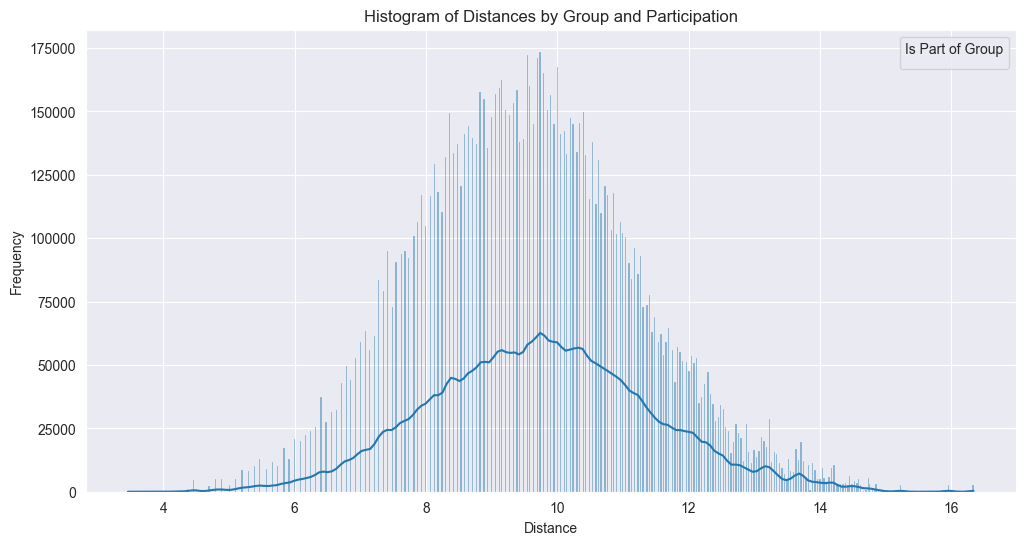

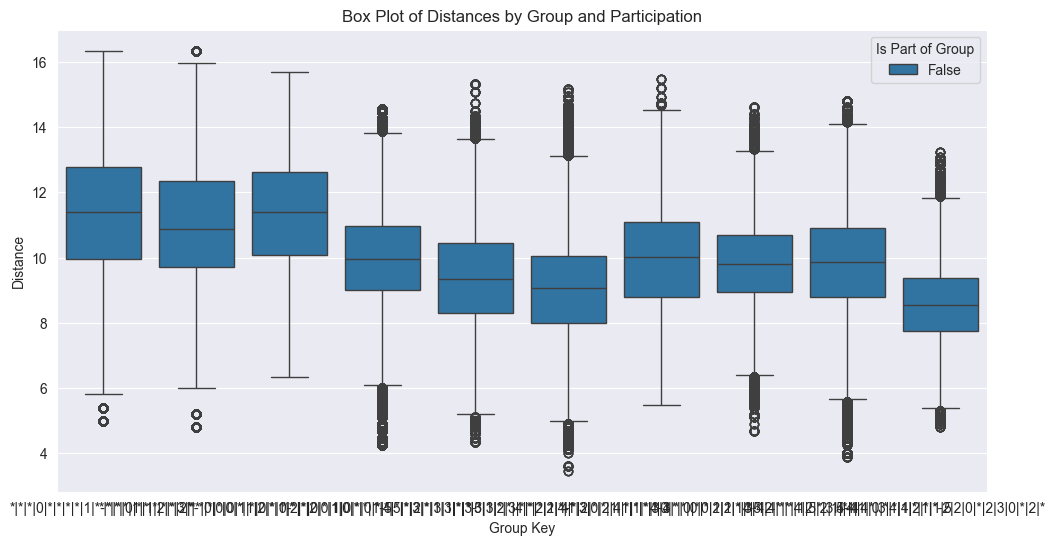

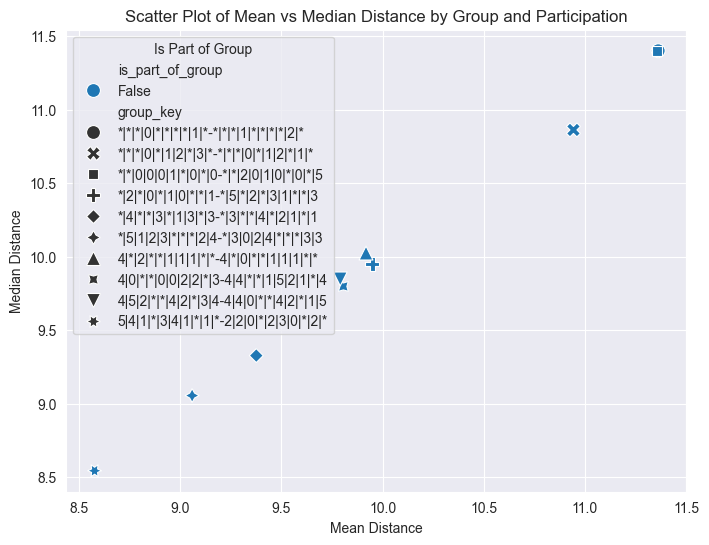

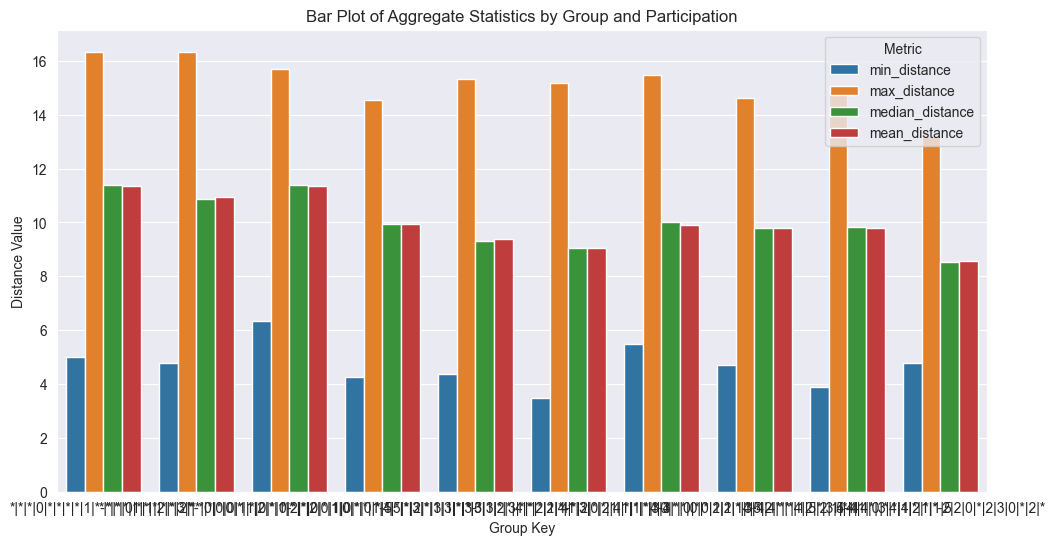

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Matplotlib does not block the execution
plt.ioff()

# 1. Histogram of Distances for Each Group with `is_part_of_group`
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df_fast, x="distance", hue="is_part_of_group", kde=True, multiple="stack")
plt.title("Histogram of Distances by Group and Participation")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend(title="Is Part of Group")
plt.show()

# 2. Box Plot of Distances by Group and `is_part_of_group`
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df_fast, x="group_key", y="distance", hue="is_part_of_group")
plt.title("Box Plot of Distances by Group and Participation")
plt.xlabel("Group Key")
plt.ylabel("Distance")
plt.legend(title="Is Part of Group")
plt.show()

# 3. Scatter Plot of Mean vs Median Distance by Group and `is_part_of_group`
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=agg_stats_fast, x="mean_distance", y="median_distance",
    hue="is_part_of_group", style="group_key", s=100
)
plt.title("Scatter Plot of Mean vs Median Distance by Group and Participation")
plt.xlabel("Mean Distance")
plt.ylabel("Median Distance")
plt.legend(title="Is Part of Group")
plt.show()

# 4. Bar Plot of Aggregate Statistics by Group and `is_part_of_group`
agg_stats_melted = agg_stats_fast.melt(
    id_vars=["group_key", "is_part_of_group"],
    value_vars=["min_distance", "max_distance", "median_distance", "mean_distance"],
    var_name="Metric", value_name="Value"
)
plt.figure(figsize=(12, 6))
sns.barplot(data=agg_stats_melted, x="group_key", y="Value", hue="Metric", dodge=True)
plt.title("Bar Plot of Aggregate Statistics by Group and Participation")
plt.xlabel("Group Key")
plt.ylabel("Distance Value")
plt.legend(title="Metric")
plt.show()


In [23]:
distance_columns = ["min_distance", "max_distance", "mean_distance", "median_distance"]
calculated_columns = [col for col in merged_final_df_fast.columns if col.startswith("calculated")]

# Calculate correlations
correlation_results = merged_final_df_fast[calculated_columns + distance_columns].corr()

# Filter relevant correlations (calculated_metrics vs distance metrics)
correlations = correlation_results.loc[calculated_columns, distance_columns]


In [24]:
correlations

,min_distance,max_distance,mean_distance,median_distance
calculated_epistemic_mean,-0.537494,-0.489185,-0.853845,-0.851712
calculated_epistemic_min,0.179121,-0.093391,-0.042473,-0.040116
calculated_epistemic_max,-0.626667,-0.790476,-0.707485,-0.675974
calculated_epistemic_median,0.254044,-0.307734,-0.196270,-0.199643
calculated_aleatoric_mean,0.003927,-0.310996,-0.240504,-0.241746
calculated_aleatoric_min,0.232579,-0.453161,-0.301392,-0.314263
calculated_aleatoric_max,-0.353086,-0.390162,-0.647119,-0.653077
calculated_aleatoric_median,0.162617,-0.298071,-0.069517,-0.069036
calculated_magnitude_mean,0.266268,0.571612,0.198718,0.152589
calculated_magnitude_min,0.266268,0.571612,0.198718,0.152589
